In [315]:
def func(x, k, b):
    y = k * x + b
    return y

In [316]:
def Packing(d): 
    dr=(d-np.min(d))*(1/(np.max(d)-np.min(d)))
    return dr

In [317]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as pll
%matplotlib inline
import random

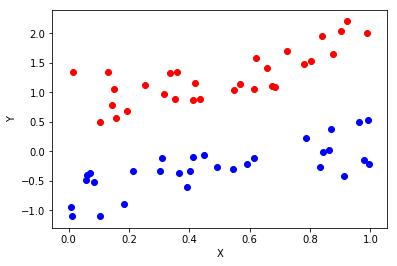

In [360]:
k = 10000
b = 0

A=np.zeros((30, 3),dtype=np.float32)
B=np.zeros((30, 3),dtype=np.float32)
expA1=np.zeros((30),dtype=np.float32)
expB1=np.zeros((30),dtype=np.float32)

for i in range(30):
    A[i][2] = 0.9
    A[i][0] = random.random()
    expA1[i] = func(A[i][0], k, b)
    A[i][1] = random.random()
    
    B[i][2] = 0.1
    B[i][0] = random.random()
    expB1[i] = func(B[i][0], k, b)
    B[i][1] = random.random()
    
p_expA1 = Packing(expA1)
p_expB1 = Packing(expB1)
for i in range(30):
    if A[i][1] < p_expA1[i]:
        A[i][1] += 2 * (p_expA1[i] - A[i][1])
    if B[i][1] > p_expB1[i]:
        B[i][1] -= 2 * (B[i][1] - p_expB1[i])
                             
A[:,1] += random.uniform(0.3, 0.5)
B[:,1] -= random.uniform(0.3, 0.5)
            
plt.scatter(A[:,0], A[:,1], color='r')
plt.scatter(B[:,0], B[:,1], color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('')
plt.show()

In [361]:
#Запись в файл
f = open('out.txt', 'w')
for i in range(30):
    f.write(str(A[i][0]) + '    ' + str(A[i][1]) + '    ' + str(A[i][2]) + '\n')
    
for i in range(30):
    f.write(str(B[i][0]) + '    ' + str(B[i][1]) + '    ' + str(B[i][2]) + '\n')
f.write('1 признак    2 признак    класс\n')
f.close()

In [354]:
#Считывание с файла
A1=np.zeros((30, 3),dtype=np.float32)
B1=np.zeros((30, 3),dtype=np.float32)
f = open('out.txt', 'r')
for i in range(30):
    k = f.readline().split()
    A1[i][0] = float(k[0])
    A1[i][1] = float(k[1])
    A1[i][2] = float(k[2])

for i in range(30):
    k = f.readline().split()
    B1[i][0] = float(k[0])
    B1[i][1] = float(k[1])
    B1[i][2] = float(k[2])
f.close()

In [399]:
#записывываю наши сгенерированные данные в удобном формате
X=np.zeros((60, 2),dtype=np.float32)
Y=np.zeros((60, 1),dtype=np.float32)
for i in range(30):
    X[i][0] = A[i][0]
    X[i][1] = A[i][1]
    Y[i] = A[:, 2][i]
for i in range(30):
    X[i + 30][0] = B[i][0]
    X[i + 30][1] = B[i][1]
    Y[i + 30] = B[:, 2][i]

In [401]:
Y

array([[0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.9],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1],
       [0.1]], dtype=float32)

In [419]:
#
#
#Тут само обучение
#можно вывести l2 после этого блока там записаны предсказания нейросети на нашей тренирвовочной выборке
#а вообще в массиве Y записанны классы каждого объекта(для сравнения)
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
           return x*(1-x)

	return 1/(1+np.exp(-x))
    

np.random.seed(1)

# случайно инициализируем веса, в среднем - 0
syn0 = 2*np.random.random((2,2)) - 1
syn1 = 2*np.random.random((2,1)) - 1

for j in range(190000):

	# проходим вперёд по слоям 0, 1 и 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # как сильно мы ошиблись относительно нужной величины?
    l2_error = Y - l2
    
    if (j% 10000) == 0:
        print ("E:" + str(np.mean(np.abs(l2_error))))
        
    # в какую сторону нужно двигаться?
    # если мы были уверены в предсказании, то сильно менять его не надо
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # как сильно значения l1 влияют на ошибки в l2?
    l1_error = l2_delta.dot(syn1.T)
    
    # в каком направлении нужно двигаться, чтобы прийти к l1?
    # если мы были уверены в предсказании, то сильно менять его не надо
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

E:0.36047869169094954
E:0.002593771062894411
E:0.0018750350136335378
E:0.0015317341314553977
E:0.001323376860296181
E:0.0011806100367684539
E:0.001075675397154079
E:0.000993918327795877
E:0.0009279437577975134
E:0.0008732784554245483
E:0.0008270392897428267
E:0.0007872744916417894
E:0.0007526100442237733
E:0.0007220472475050324
E:0.000694840634253184
E:0.0006704211062380341
E:0.000648345757474326
E:0.0006282640914259304
E:0.0006100054506102973


### l2

In [420]:
#
l0 = X
l1 = nonlin(np.dot(l0,syn0))
l2 = nonlin(np.dot(l1,syn1))

In [418]:
l2

array([[0.90053473],
       [0.8994551 ],
       [0.89933125],
       [0.90048421],
       [0.89772582],
       [0.89891499],
       [0.89905379],
       [0.90047905],
       [0.89989388],
       [0.90064892],
       [0.90074913],
       [0.90079402],
       [0.89965091],
       [0.90013645],
       [0.89937014],
       [0.90058469],
       [0.90041641],
       [0.90044486],
       [0.90000654],
       [0.89833043],
       [0.89985319],
       [0.90105346],
       [0.90003163],
       [0.90096123],
       [0.90012586],
       [0.90057726],
       [0.90083251],
       [0.89992824],
       [0.9000917 ],
       [0.89961888],
       [0.10022309],
       [0.09928911],
       [0.09980059],
       [0.09936285],
       [0.09997558],
       [0.10058683],
       [0.09930691],
       [0.1013227 ],
       [0.09961546],
       [0.10005298],
       [0.10052215],
       [0.10031806],
       [0.09938038],
       [0.10038695],
       [0.09959278],
       [0.09927841],
       [0.09926968],
       [0.099